#Extracción

In [ ]:
# Importar librerias
import requests
import json
import pandas as pd
from pandas import json_normalize, read_json, DataFrame

day_from, day_to = 1, 31
date_response = []
datas = []

for i in range(day_from, day_to + 1):
  # Ejecutar GET Request y Dirección de la página web con el día
  day_response = requests.get("http://api.tvmaze.com/schedule/web?date=2020-12-{}".format("%02d" % (i,)))
  # Se lee la cadena JSON
  date_response.append(json.loads(day_response.text))

print(len(date_response))
print(len(date_response[0]))

# se condensa toda la información en una lista
for day in date_response:
  for value in day:
    # se convierte la lista de generos a un string separado por comas de generos
    value['_embedded']['show']['genres'] = ','.join(x for x in value['_embedded']['show']['genres'])
    datas.append(value)

31
98


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Se almacena json
with open('/content/drive/MyDrive/Analytics Engineer/data.json', 'w') as file:
    json.dump(datas, file, indent=4)

In [ ]:
 # se pasa el objeto JSON a la json_normalize para obtener dataframe
print(len(datas))
df = json_normalize(datas)

3037


In [ ]:
df['_embedded.show.genres']

0                                     
1                               Comedy
2                                Music
3         Action,Anime,Science-Fiction
4       Action,Adventure,Anime,Fantasy
                     ...              
3032              Drama,Crime,Thriller
3033              Drama,Crime,Thriller
3034              Drama,Crime,Thriller
3035              Drama,Crime,Thriller
3036              Drama,Crime,Thriller
Name: _embedded.show.genres, Length: 3037, dtype: object

#Profiling

In [ ]:
# Se confirma el total de los datos: 3.037 registros y 62 variables
df.shape

(3037, 62)

In [ ]:
# Muestra
df.sample(n=10)

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,...,_embedded.show.network.country.code,_embedded.show.network.country.timezone,_embedded.show.network.officialSite,_embedded.show._links.nextepisode.href,_embedded.show.webChannel,_embedded.show.image,_embedded.show.webChannel.country,_embedded.show.dvdCountry.name,_embedded.show.dvdCountry.code,_embedded.show.dvdCountry.timezone
2020,1984466,https://www.tvmaze.com/episodes/1984466/new-ja...,Road to Tokyo Dome Night 1,2020,88.0,regular,2020-12-21,18:30,2020-12-21T09:30:00+00:00,120.0,...,NaN,NaN,NaN,https://api.tvmaze.com/episodes/2353245,NaN,NaN,NaN,NaN,NaN,NaN
951,2000049,https://www.tvmaze.com/episodes/2000049/ultima...,Episode 2,1,2.0,regular,2020-12-10,,2020-12-10T12:00:00+00:00,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2153,1992679,https://www.tvmaze.com/episodes/1992679/rhyme-...,The Teaspoon Dance / Jaime's Bridge Has Fallen...,1,8.0,regular,2020-12-22,,2020-12-22T12:00:00+00:00,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628,1971206,https://www.tvmaze.com/episodes/1971206/the-ru...,Episode 20,1,20.0,regular,2020-12-07,20:00,2020-12-07T12:00:00+00:00,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,1945144,https://www.tvmaze.com/episodes/1945144/nobles...,Blood Contract / Devote,1,9.0,regular,2020-12-02,00:00,2020-12-03T05:00:00+00:00,25.0,...,JP,Asia/Tokyo,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2965,1998673,https://www.tvmaze.com/episodes/1998673/louder...,Stuck In The Middle With You,3,1.0,regular,2020-12-31,,2020-12-31T12:00:00+00:00,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1768,1990512,https://www.tvmaze.com/episodes/1990512/black-...,Jatin Must Die,1,9.0,regular,2020-12-18,,2020-12-18T06:30:00+00:00,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2884,2007690,https://www.tvmaze.com/episodes/2007690/my-bes...,Episode 6,1,6.0,regular,2020-12-30,,2020-12-30T12:00:00+00:00,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,1976033,https://www.tvmaze.com/episodes/1976033/twiste...,Episode 22,1,22.0,regular,2020-12-08,20:00,2020-12-08T12:00:00+00:00,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307,1972058,https://www.tvmaze.com/episodes/1972058/red-vs...,Shattered,18,6.0,regular,2020-12-14,,2020-12-14T12:00:00+00:00,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Se verifica las variables con las que se cuenta, la cantidad de valores no nulos y su tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3037 entries, 0 to 3036
Data columns (total 62 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          3037 non-null   int64  
 1   url                                         3037 non-null   object 
 2   name                                        3037 non-null   object 
 3   season                                      3037 non-null   int64  
 4   number                                      2956 non-null   float64
 5   type                                        3037 non-null   object 
 6   airdate                                     3037 non-null   object 
 7   airtime                                     3037 non-null   object 
 8   airstamp                                    3037 non-null   object 
 9   runtime                                     2810 non-null   float64
 10  image       

In [ ]:
# Se calcula porcentaje de valores faltantes
dfr=pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2), columns=['Missings'])
# Se filtra Missings >= 1
df2 = dfr[dfr['Missings'] >= 1]
df2

,Missings
number,2.67
runtime,7.47
image,100.00
summary,70.69
rating.average,90.09
_embedded.show.language,1.12
_embedded.show.runtime,32.86
_embedded.show.averageRuntime,5.27
_embedded.show.ended,56.17
_embedded.show.officialSite,12.68


In [ ]:
# Mostrar la cantidad de registros, media, min, quarlies, etc de todos los datos numericos
df.describe(include='all')

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,...,_embedded.show.network.country.code,_embedded.show.network.country.timezone,_embedded.show.network.officialSite,_embedded.show._links.nextepisode.href,_embedded.show.webChannel,_embedded.show.image,_embedded.show.webChannel.country,_embedded.show.dvdCountry.name,_embedded.show.dvdCountry.code,_embedded.show.dvdCountry.timezone
count,9.800000e+01,98,98,98.000000,98.000000,98,98,98,98,93.00000,...,13,13,0.0,5,0.0,0.0,0.0,1,1,1
unique,NaN,98,92,NaN,NaN,1,1,15,20,NaN,...,7,7,NaN,5,NaN,NaN,NaN,1,1,1
top,NaN,https://www.tvmaze.com/episodes/1979824/sim-fo...,Episode 21,NaN,NaN,regular,2020-12-01,,2020-12-01T12:00:00+00:00,NaN,...,RU,Asia/Kamchatka,NaN,https://api.tvmaze.com/episodes/2309426,NaN,NaN,NaN,Japan,JP,Asia/Tokyo
freq,NaN,1,2,NaN,NaN,98,98,64,64,NaN,...,3,3,NaN,1,NaN,NaN,NaN,1,1,1
mean,2.018019e+06,NaN,NaN,208.081633,25.612245,NaN,NaN,NaN,NaN,32.11828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.446022e+04,NaN,NaN,613.949420,48.059378,NaN,NaN,NaN,NaN,22.96777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.939481e+06,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,5.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.976152e+06,NaN,NaN,1.000000,4.250000,NaN,NaN,NaN,NaN,13.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.978707e+06,NaN,NaN,1.000000,11.000000,NaN,NaN,NaN,NaN,26.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.033287e+06,NaN,NaN,2.000000,21.750000,NaN,NaN,NaN,NaN,45.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Ver las categorias type
df['type'].unique()

array(['regular', 'significant_special', 'insignificant_special'],
      dtype=object)

In [ ]:
 #Ver las categorias language
df['_embedded.show.language'].unique()

array(['Korean', 'Russian', 'Chinese', 'Japanese', 'Persian', 'Norwegian',
       'English', 'Turkish', 'Spanish', 'Swedish', 'Arabic', 'Tagalog',
       'Dutch', 'French', 'Kazakh', 'Hungarian', 'Thai', None,
       'Portuguese', 'Ukrainian', 'German', 'Polish', 'Hindi', 'Italian',
       'Panjabi', 'Danish', 'Romanian', 'Lithuanian', 'Latvian', 'Malay',
       'Bengali', 'Tamil', 'Greek', 'Indonesian', 'Finnish', 'Vietnamese',
       'Hebrew'], dtype=object)

In [ ]:
 #Ver las categorias genres
df['_embedded.show.genres'].unique()

array(['', 'Comedy', 'Music', 'Action,Anime,Science-Fiction',
       'Action,Adventure,Anime,Fantasy', 'Romance',
       'Drama,Romance,History', 'Anime', 'Drama,Children,Family',
       'Adventure,Nature', 'Drama', 'Drama,Crime', 'Drama,Action,Crime',
       'Sports', 'Adventure', 'Medical,Sports,Legal',
       'Drama,Science-Fiction', 'Drama,Romance', 'Drama,Thriller,Mystery',
       'Action,Crime,Thriller', 'Food,Nature',
       'Drama,Romance,Supernatural', 'Crime,Thriller,Mystery',
       'Comedy,Fantasy,Mystery', 'Drama,Comedy', 'Comedy,Children',
       'Comedy,Children,Music', 'Drama,Food,Romance',
       'Comedy,Music,Science-Fiction', 'Crime', 'Drama,Comedy,Crime',
       'Drama,Children,Music', 'Drama,Romance,Mystery',
       'Comedy,Anime,Supernatural', 'Comedy,Action,Anime,Fantasy',
       'Comedy,Anime,Science-Fiction', 'Action', 'Drama,Comedy,Children',
       'Travel', 'Drama,Comedy,Romance', 'War,History',
       'Drama,Anime,Romance', 'Science-Fiction,Nature', 'Childr

In [ ]:
 #Ver las categorias country
df['_embedded.show.webChannel.country.name'].unique()

array(['Korea, Republic of', 'Russian Federation', 'China', 'Japan', nan,
       'Iran, Islamic Republic of', 'Norway', 'United Kingdom',
       'Kazakhstan', 'Turkey', 'Egypt', 'United States', 'Brazil',
       'Netherlands', 'Germany', 'Belgium', 'Philippines', 'India',
       'Spain', 'Portugal', 'Canada', 'Sweden', 'Hong Kong', 'Malaysia',
       'Bangladesh', 'France', 'Greece', 'Finland', 'Australia',
       'Taiwan, Province of China', 'Poland', 'Thailand', 'Denmark'],
      dtype=object)

#Limpieza

In [ ]:
# Se eliminan las columnas sin datos
df33= df.drop(['image', '_embedded.show.network', '_embedded.show.dvdCountry', '_embedded.show.webChannel', '_embedded.show.image', '_embedded.show.webChannel.country'], axis=1)
# convertir a tipo fecha airdate
df33['airdate'] = pd.to_datetime(df33['airdate'])

In [ ]:
# nuevo df
df33.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3037 entries, 0 to 3036
Data columns (total 56 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   id                                          3037 non-null   int64         
 1   url                                         3037 non-null   object        
 2   name                                        3037 non-null   object        
 3   season                                      3037 non-null   int64         
 4   number                                      2956 non-null   float64       
 5   type                                        3037 non-null   object        
 6   airdate                                     3037 non-null   datetime64[ns]
 7   airtime                                     3037 non-null   object        
 8   airstamp                                    3037 non-null   object        
 9   runtime 

#Almacenar

In [137]:
from sqlalchemy import create_engine
engine= create_engine('sqlite://', echo=False) 

url = '/content/drive/MyDrive/Analytics Engineer/data.sql'
df33.to_sql(url, con=engine)

#Análisis

In [138]:
# Funcion para agregar etiquetas
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

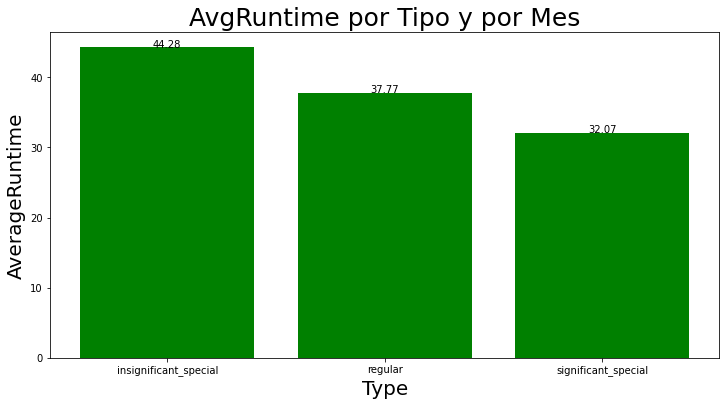

In [139]:
# averageRuntime por tipo (type) por mes
a1= pd.DataFrame(round(df33.groupby('type')['runtime'].mean(),2))

import matplotlib.pyplot as plt

Type = a1.index
AverageRuntime = a1['runtime']

# Se define el tamaño del gráfico
plt.figure(figsize=(12,6))
# Dibujamos un grafico de barras, especificando (valor eje X, valor eje Y)
plt.bar(Type,AverageRuntime,color="green")
addlabels(Type,AverageRuntime)
plt.title('AvgRuntime por Tipo y por Mes', fontsize=25)
plt.xlabel('Type', fontsize=20)
plt.ylabel('AverageRuntime', fontsize=20)
# Mostramos el gráfico
plt.show()

In [150]:
#Cantidad de series emitidas por género por mes.
a2= pd.DataFrame(round(df33.groupby('_embedded.show.genres')['id'].count(),2))

# Se asigna el nombre cantidad a la columna
a2.columns=['cant']
# Se ordena por promedio de mayor a menor
da2=a2.sort_values(by=['cant'],ascending=False)
da2

,cant
_embedded.show.genres,
,745
Comedy,274
"Drama,Romance",268
Drama,96
"Drama,Comedy,Romance",84
...,...
"Comedy,Supernatural",1
"Horror,Thriller,Supernatural",1
"Comedy,Food,Travel",1


In [151]:
#Porcentaje por país, con respecto al total de series emitidas por mes.
a3= pd.DataFrame(round(df33.groupby('_embedded.show.webChannel.country.name')['id'].count()/df33.shape[0],2))
# Se asigna el nombre cantidad a la columna
a3.columns=['perc.']
# Se ordena por promedio de mayor a menor
da3=a3.sort_values(by=['perc.'],ascending=False)
da3

,perc.
_embedded.show.webChannel.country.name,
China,0.16
United States,0.06
Norway,0.06
"Korea, Republic of",0.04
Russian Federation,0.04
India,0.02
Spain,0.01
Japan,0.01
Hong Kong,0.01


In [148]:
# Rating promedio de series por país y género por mes.

#tabla=pd.crosstab(datos1.FAMI_CUARTOSHOGAR, datos1.FAMI_NIVEL_SISBEN)


a4= pd.DataFrame(round(df33.groupby(['_embedded.show.webChannel.country.name', '_embedded.show.genres'])['rating.average'].mean(),2))

# Se asigna el nombre cantidad a la columna
a4.columns=['promedio']
# Se ordena por promedio de mayor a menor
da4=a4.sort_values(by=['promedio'],ascending=False)
# Se filtra 
df4 = da4[da4['promedio'] >= 0]
df4

promedio
_embedded.show.webChannel.country.name _embedded.show.genres                           
Korea, Republic of                     Drama,Romance,Mystery                       9.75
                                       Drama,Romance                               9.50
United States                          Comedy,Children,Family                      9.50
China                                  Drama,Romance                               8.75
United Kingdom                         Drama,Crime,Thriller                        8.72
Philippines                            Drama,Romance                               8.65
United States                          Medical                                     8.50
Germany                                Comedy                                      8.50
United Kingdom                         Comedy,Supernatural                         8.20
Norway                                 Drama,War,History                           8.15
Sweden                                 Drama,Crime,Mystery                         8.00
Canada                                 Comedy                                      7.83
United States                          Comedy                                      7.57
Thailand                               Drama,Comedy,Food                           7.50
Russian Federation                     Crime,Mystery                               7.50
United States                          Drama                                       7.44
                                       Drama,Mystery,Supernatural                  7.33
Spain                                  Drama                                       7.00
United States                          Action,Adventure,Anime,Science-Fiction      6.27
                                                                                   6.25
                                       Drama,Horror                                6.10
Russian Federation                     Comedy                                      6.00
United Kingdom                         Comedy                                      6.00
United States                          Drama,Crime,Thriller                        4.50